## Outlier Detection and EDA Task One

**Strategy** 
- Use visualizations to determine outliers and observe the mean 
- compare with an null hypothesis that Ho = 0

In [94]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("flight_sample_small.csv")

In [115]:
df = pd.read_csv("flight_sample_large.csv")

In [8]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime'],
      dtype='object')

<AxesSubplot:xlabel='arr_delay'>

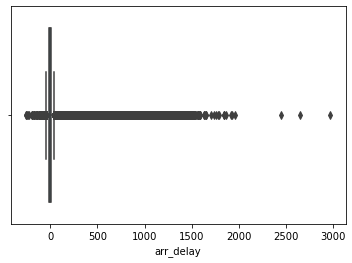

In [15]:
sns.boxplot(x="arr_delay", data=df)

**Compare with Distance**

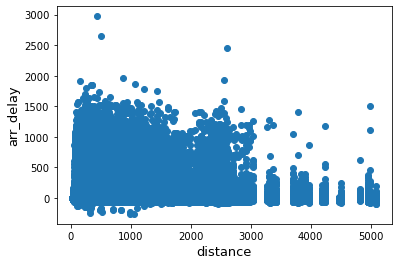

In [96]:
fig, ax = plt.subplots()
ax.scatter(x = df['distance'], y = df['arr_delay'])
plt.ylabel('arr_delay', fontsize=13)
plt.xlabel('distance', fontsize=13)
plt.show()

In [116]:
# delete outliers
df_trail = df.drop(df[(df['arr_delay']>1500)].index)
#reset index
df_trail = df_trail.reset_index(drop=True)

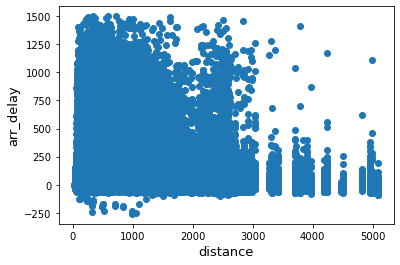

In [98]:
#check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = df_trail['distance'], y = df_trail['arr_delay'])
plt.ylabel('arr_delay', fontsize=13)
plt.xlabel('distance', fontsize=13)
plt.show()

**Compare with Dep_Delay**

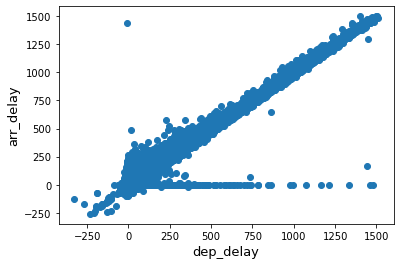

In [99]:
fig, ax = plt.subplots()
ax.scatter(x = df_trail['dep_delay'], y = df_trail['arr_delay'])
plt.ylabel('arr_delay', fontsize=13)
plt.xlabel('dep_delay', fontsize=13)
plt.show()

In [117]:
# delete outliers
df_trail = df_trail.drop(df_trail[(df_trail["dep_delay"]<250) & (df_trail['arr_delay']>1000)].index)

# reset index
df_trail = df_trail.reset_index(drop=True)

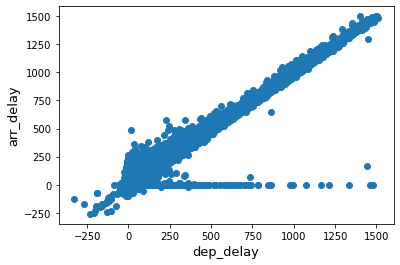

In [101]:
#check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = df_trail['dep_delay'], y = df_trail['arr_delay'])
plt.ylabel('arr_delay', fontsize=13)
plt.xlabel('dep_delay', fontsize=13)
plt.show()

**Compare with Taxi Out**

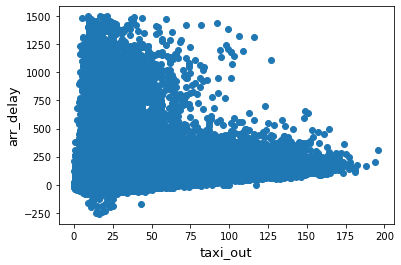

In [102]:
fig, ax = plt.subplots()
ax.scatter(x = df_trail['taxi_out'], y = df_trail['arr_delay'])
plt.ylabel('arr_delay', fontsize=13)
plt.xlabel('taxi_out', fontsize=13)
plt.show()

**Compare with Taxi In**

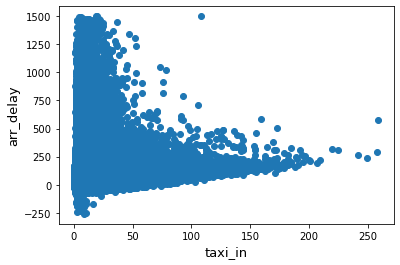

In [103]:
fig, ax = plt.subplots()
ax.scatter(x = df_trail['taxi_in'], y = df_trail['arr_delay'])
plt.ylabel('arr_delay', fontsize=13)
plt.xlabel('taxi_in', fontsize=13)
plt.show()

In [118]:
# delete outliers
df_trail = df_trail.drop(df_trail[(df_trail["taxi_in"]<110) & (df_trail['arr_delay']>1250)].index)

# reset index
df_trail = df_trail.reset_index(drop=True)

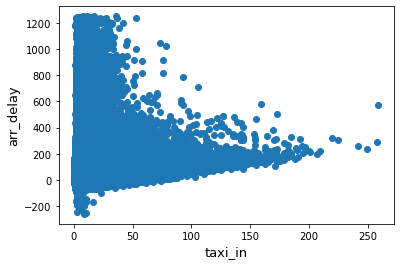

In [105]:
#review the plot
fig, ax = plt.subplots()
ax.scatter(x = df_trail['taxi_in'], y = df_trail['arr_delay'])
plt.ylabel('arr_delay', fontsize=13)
plt.xlabel('taxi_in', fontsize=13)
plt.show()

**Compare with Air Time**

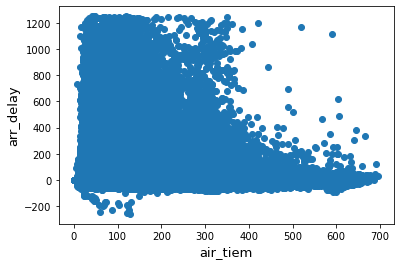

In [106]:
fig, ax = plt.subplots()
ax.scatter(x = df_trail['air_time'], y = df_trail['arr_delay'])
plt.ylabel('arr_delay', fontsize=13)
plt.xlabel('air_tiem', fontsize=13)
plt.show()

**Review Changes**

In [107]:
df_trail.arr_delay.describe()

count    4.999758e+06
mean     5.314347e+00
std      4.832912e+01
min     -2.600000e+02
25%     -1.500000e+01
50%     -6.000000e+00
75%      7.000000e+00
max      1.250000e+03
Name: arr_delay, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Delays (visual outlier treatment)')

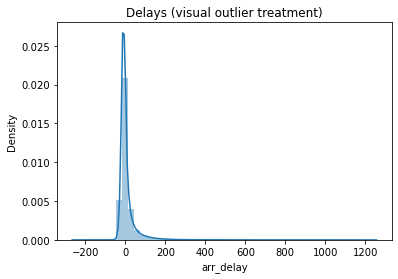

In [108]:
sns.distplot(df_trail.arr_delay).set_title("Delays (visual outlier treatment)")

**check if sample mean == 0**

In [109]:
def null_hyp(sample_mean, sample_size, sample_s, null_hyp):
    """returns whether to reject a two sided null hypothesis based on a 0.05 significance level"""
    Z = sample_mean-null_hyp /(sample_s/(sample_size**0.5))
    if Z > 1.960:
        return "reject the null hypotheses"
    else:
        return "insignificant evidence"

In [119]:
#step one set up hypothesis
#Ho is 0 and Ha > 0
Ho = 0

print(null_hyp(df_trail.arr_delay.describe()[1],
               len(df_trail),
                  df_trail.arr_delay.describe()[2],
                  Ho))

reject the null hypotheses


***Visual outlier treatment from histogram***

In [124]:
# delete outliers
df_trail = df_trail.drop(df_trail[(df_trail['arr_delay']>225)].index)
df_trail = df_trail.drop(df_trail[(df_trail['arr_delay']<-225)].index)

# reset index
df_trail = df_trail.reset_index(drop=True)

In [125]:
df_trail.arr_delay.describe()

count    4.965005e+06
mean     2.701345e+00
std      3.295673e+01
min     -2.000000e+02
25%     -1.500000e+01
50%     -6.000000e+00
75%      7.000000e+00
max      2.250000e+02
Name: arr_delay, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Delays (visual outlier treatment)')

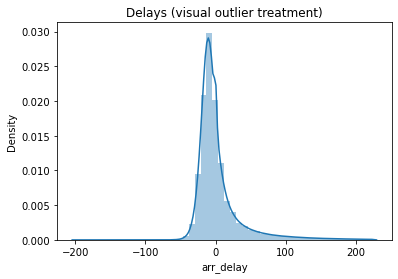

In [126]:
sns.distplot(df_trail.arr_delay).set_title("Delays (visual outlier treatment)")

In [127]:
#step one set up hypothesis
#Ho is 0 and Ha != 0
Ho = 0

print(null_hyp(df_trail.arr_delay.describe()[1],
               len(df_trail),
                  df_trail.arr_delay.describe()[2],
                  Ho))

reject the null hypotheses


In [128]:
df_trail.to_csv("flights_sample_outliersVis.csv", index=False)